In [27]:
import os 
import pandas as pd 
import datetime as dt 
from sklearn import linear_model 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-Batch-17/main/Day%2012%2613%20Time%20Series/Decomposition%20Model/Sales.csv")

In [5]:
data.head()

,Date,Sales
0,2013-01-01,2815
1,2013-02-01,2672
2,2013-03-01,2755
3,2013-04-01,2721
4,2013-05-01,2946


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(['Date'])

In [9]:
data['Quarter'] = data['Date'].dt.quarter 
data['Year'] = data['Date'].dt.year 
data['Month'] = data['Date'].dt.month

In [10]:
data.head(2)

,Date,Sales,Quarter,Year,Month
0,2013-01-01,2815,1,2013,1
1,2013-02-01,2672,1,2013,2


In [11]:
data.loc[data['Month'] == 1]['Sales']

0     2815
12    2541
24    3113
36    5375
48    3633
60    4016
72    2639
84    3934
96    4348
Name: Sales, dtype: int64

In [48]:
Train = data[(data.Year<2020)]
Test = data[(data.Year>=2020)]

In [49]:
Train.shape

(84, 5)

In [50]:
Train['Months_sum'] = Train.groupby(['Month'])['Sales'].transform(sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
Train['S.I'] = Train['Months_sum'].apply(lambda x: ((x*12)/(Train['Sales'].sum())))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
Train['S.I'].value_counts()

1.208787    7
0.797918    7
1.800523    7
0.730116    7
0.380308    7
0.736033    7
0.860321    7
0.780350    7
0.923396    7
2.253879    7
0.682871    7
0.845498    7
Name: S.I, dtype: int64

In [53]:
Train = Train.sort_values(['Date'])
Train.index = range(len(Train))
Train['ID'] = range(1,len(Train)+1))

In [54]:
lm = linear_model.LinearRegression()
x = np.array(Train[['ID']])
y = np.array(Train['Sales']).reshape(-1,1)

In [55]:
model = lm.fit(x,y)

In [56]:
Test['ID'] = range(len(Test))
Test['ID'] = Test['ID']+max(Train["ID"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
X_test = np.array(Test[['ID']])
Y_test = model.predict(X_test)

In [58]:
Train.iloc[0:9]['S.I']

0    0.736033
1    0.682871
2    0.780350
3    0.797918
4    0.845498
5    0.860321
6    0.730116
7    0.380308
8    0.923396
Name: S.I, dtype: float64

In [59]:
Test['Trend'] = Y_test
Test['Prediction'] = Y_test*np.array(Train.iloc[0:len(Y_test)]['S.I']).reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
Test

,Date,Sales,Quarter,Year,Month,ID,Trend,Prediction
84,2020-01-01,3934,1,2020,1,84,6208.707283,4569.812067
85,2020-02-01,3162,1,2020,2,85,6245.452094,4264.836794
86,2020-03-01,4286,1,2020,3,86,6282.196905,4902.310381
87,2020-04-01,4676,2,2020,4,87,6318.941716,5041.996373
88,2020-05-01,5010,2,2020,5,88,6355.686528,5373.722063
89,2020-06-01,4874,2,2020,6,89,6392.431339,5499.545620
90,2020-07-01,4633,3,2020,7,90,6429.176150,4694.042594
91,2020-08-01,1659,3,2020,8,91,6465.920961,2459.041482
92,2020-09-01,5951,3,2020,9,92,6502.665772,6004.535583
93,2020-10-01,6981,4,2020,10,93,6539.410584,7904.755357


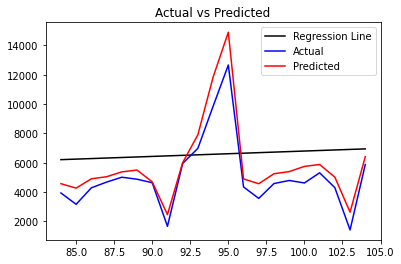

In [60]:
plt.title("Actual vs Predicted")
plt.plot(Test['Trend'],color = 'black',label = 'Regression Line')
plt.plot(Test['Sales'],color = 'blue',label = 'Actual')
plt.plot(Test['Prediction'],color = 'Red',label = 'Predicted')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(Test['Sales'],Test['Prediction'])

0.1950550068309533